In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

from boruta import BorutaPy

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


import seaborn as sns




# Insert Train data

In [2]:
app_train=pd.read_csv('app_train.csv')
app_train.head()
train=app_train.drop(['Unnamed: 0',],axis = 1)
train

,LN_ID,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,INCOME_TYPE,...,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_ID_CHANGE,WEEKDAYS_APPLY,HOUR_APPLY,ORGANIZATION_TYPE,EXT_SCORE_1,EXT_SCORE_2,EXT_SCORE_3
0,333538,0,Revolving loans,F,1,67500.0,202500.0,10125.0,202500.0,Working,...,-11539,-921,-119.0,-2757,TUESDAY,18,Business Entity Type 3,0.572805,0.608276,NaN
1,406644,0,Cash loans,F,1,202500.0,976711.5,49869.0,873000.0,Commercial associate,...,-15743,-4482,-1797.0,-2455,TUESDAY,14,Other,0.655600,0.684298,NaN
2,259130,0,Cash loans,F,0,180000.0,407520.0,25060.5,360000.0,Pensioner,...,-20775,365243,-8737.0,-4312,THURSDAY,14,NA1,NaN,0.580687,0.749022
3,411997,0,Cash loans,M,0,225000.0,808650.0,26086.5,675000.0,State servant,...,-20659,-10455,-4998.0,-4010,WEDNESDAY,10,Culture,NaN,0.623740,0.710674
4,241559,0,Revolving loans,M,0,135000.0,180000.0,9000.0,180000.0,Commercial associate,...,-9013,-1190,-3524.0,-1644,SUNDAY,11,Construction,0.175511,0.492994,0.085595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61498,251159,0,Cash loans,M,2,360000.0,450000.0,44509.5,450000.0,State servant,...,-14268,-5813,-2313.0,-2709,FRIDAY,6,Electricity,0.295858,0.104877,0.616122
61499,441376,1,Cash loans,F,0,441000.0,904500.0,38452.5,904500.0,Pensioner,...,-21582,365243,-4106.0,-4191,TUESDAY,12,NA1,0.693816,0.411595,0.239226
61500,184648,0,Revolving loans,F,0,202500.0,900000.0,45000.0,900000.0,Commercial associate,...,-17729,-1564,-11844.0,-1263,FRIDAY,16,Industry: type 12,0.802154,0.714627,NaN
61501,313981,0,Cash loans,F,0,94500.0,360000.0,17509.5,360000.0,Working,...,-11258,-4159,-5060.0,-3698,FRIDAY,15,Business Entity Type 3,NaN,0.694125,0.105473


,LN_ID,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,INCOME_TYPE,...,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_ID_CHANGE,WEEKDAYS_APPLY,HOUR_APPLY,ORGANIZATION_TYPE,EXT_SCORE_1,EXT_SCORE_2,EXT_SCORE_3
0,333538,0,Revolving loans,F,1,67500.0,202500.0,10125.0,202500.0,Working,...,-11539,-921,-119.0,-2757,TUESDAY,18,Business Entity Type 3,0.572805,0.608276,NaN
1,406644,0,Cash loans,F,1,202500.0,976711.5,49869.0,873000.0,Commercial associate,...,-15743,-4482,-1797.0,-2455,TUESDAY,14,Other,0.655600,0.684298,NaN
2,259130,0,Cash loans,F,0,180000.0,407520.0,25060.5,360000.0,Pensioner,...,-20775,365243,-8737.0,-4312,THURSDAY,14,NA1,NaN,0.580687,0.749022
3,411997,0,Cash loans,M,0,225000.0,808650.0,26086.5,675000.0,State servant,...,-20659,-10455,-4998.0,-4010,WEDNESDAY,10,Culture,NaN,0.623740,0.710674
4,241559,0,Revolving loans,M,0,135000.0,180000.0,9000.0,180000.0,Commercial associate,...,-9013,-1190,-3524.0,-1644,SUNDAY,11,Construction,0.175511,0.492994,0.085595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61498,251159,0,Cash loans,M,2,360000.0,450000.0,44509.5,450000.0,State servant,...,-14268,-5813,-2313.0,-2709,FRIDAY,6,Electricity,0.295858,0.104877,0.616122
61499,441376,1,Cash loans,F,0,441000.0,904500.0,38452.5,904500.0,Pensioner,...,-21582,365243,-4106.0,-4191,TUESDAY,12,NA1,0.693816,0.411595,0.239226
61500,184648,0,Revolving loans,F,0,202500.0,900000.0,45000.0,900000.0,Commercial associate,...,-17729,-1564,-11844.0,-1263,FRIDAY,16,Industry: type 12,0.802154,0.714627,NaN
61501,313981,0,Cash loans,F,0,94500.0,360000.0,17509.5,360000.0,Working,...,-11258,-4159,-5060.0,-3698,FRIDAY,15,Business Entity Type 3,NaN,0.694125,0.105473


# Data Pre-processing

In [3]:
train['MONTH_AGE']=train['DAYS_AGE']/30
train['MONTH_WORK']=train['DAYS_WORK']/30
train['MONTH_REGISTRATION']=train['DAYS_REGISTRATION']/30
train['MONTH_ID_CHANGE']=train['DAYS_ID_CHANGE']/30

train=train.drop(['DAYS_AGE','DAYS_WORK','DAYS_REGISTRATION','DAYS_ID_CHANGE'],axis = 1)

train['MONTH_AGE']=train['MONTH_AGE'].astype('int64', copy=False)
train['MONTH_WORK']=train['MONTH_WORK'].astype('int64', copy=False)
train['MONTH_REGISTRATION']=train['MONTH_REGISTRATION'].astype('int64', copy=False)
train['MONTH_ID_CHANGE']=train['MONTH_ID_CHANGE'].astype('int64', copy=False)

train=train.drop(['APPROVED_CREDIT'],axis = 1)
train.head()

,LN_ID,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,ANNUITY,PRICE,INCOME_TYPE,EDUCATION,...,WEEKDAYS_APPLY,HOUR_APPLY,ORGANIZATION_TYPE,EXT_SCORE_1,EXT_SCORE_2,EXT_SCORE_3,MONTH_AGE,MONTH_WORK,MONTH_REGISTRATION,MONTH_ID_CHANGE
0,333538,0,Revolving loans,F,1,67500.0,10125.0,202500.0,Working,Secondary / secondary special,...,TUESDAY,18,Business Entity Type 3,0.572805,0.608276,NaN,-384,-30,-3,-91
1,406644,0,Cash loans,F,1,202500.0,49869.0,873000.0,Commercial associate,Secondary / secondary special,...,TUESDAY,14,Other,0.655600,0.684298,NaN,-524,-149,-59,-81
2,259130,0,Cash loans,F,0,180000.0,25060.5,360000.0,Pensioner,Secondary / secondary special,...,THURSDAY,14,NA1,NaN,0.580687,0.749022,-692,12174,-291,-143
3,411997,0,Cash loans,M,0,225000.0,26086.5,675000.0,State servant,Higher education,...,WEDNESDAY,10,Culture,NaN,0.623740,0.710674,-688,-348,-166,-133
4,241559,0,Revolving loans,M,0,135000.0,9000.0,180000.0,Commercial associate,Secondary / secondary special,...,SUNDAY,11,Construction,0.175511,0.492994,0.085595,-300,-39,-117,-54


,LN_ID,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,ANNUITY,PRICE,INCOME_TYPE,EDUCATION,...,WEEKDAYS_APPLY,HOUR_APPLY,ORGANIZATION_TYPE,EXT_SCORE_1,EXT_SCORE_2,EXT_SCORE_3,MONTH_AGE,MONTH_WORK,MONTH_REGISTRATION,MONTH_ID_CHANGE
0,333538,0,Revolving loans,F,1,67500.0,10125.0,202500.0,Working,Secondary / secondary special,...,TUESDAY,18,Business Entity Type 3,0.572805,0.608276,NaN,-384,-30,-3,-91
1,406644,0,Cash loans,F,1,202500.0,49869.0,873000.0,Commercial associate,Secondary / secondary special,...,TUESDAY,14,Other,0.655600,0.684298,NaN,-524,-149,-59,-81
2,259130,0,Cash loans,F,0,180000.0,25060.5,360000.0,Pensioner,Secondary / secondary special,...,THURSDAY,14,NA1,NaN,0.580687,0.749022,-692,12174,-291,-143
3,411997,0,Cash loans,M,0,225000.0,26086.5,675000.0,State servant,Higher education,...,WEDNESDAY,10,Culture,NaN,0.623740,0.710674,-688,-348,-166,-133
4,241559,0,Revolving loans,M,0,135000.0,9000.0,180000.0,Commercial associate,Secondary / secondary special,...,SUNDAY,11,Construction,0.175511,0.492994,0.085595,-300,-39,-117,-54


In [4]:
#train=pd.get_dummies(train)
train2=train.select_dtypes(include='number')

In [5]:
features = [f for f in train.columns if f not in ['TARGET','LN_ID']]
len(features)

train[features] = train[features].fillna(train[features].mean()).clip(-1e9,1e9)

#  Insert Sec Data

In [6]:
sec_data=pd.read_pickle("sec2_data.pkl")
sec_data

,NFLAG_INSURED_ON_APPROVAL,"(HAVE_LOAN, mean)","(LATE_PAYMENT, mean)",UNFINISH_LOAN,APPROVED,CANCELED,REFUSED
,mean,mean,mean,max,mean,mean,mean
LN_ID,,,,,,,
100009,0.000000,0.000000,0.000000,1,1.00,0.00,0.00
100039,0.666667,0.000000,0.396465,1,0.75,0.25,0.00
100044,0.500000,0.064777,0.182186,1,1.00,0.00,0.00
100045,0.500000,0.088235,0.014706,1,1.00,0.00,0.00
100046,1.000000,0.000000,0.000000,1,0.50,0.00,0.50
...,...,...,...,...,...,...,...
456247,0.250000,0.000000,0.000000,1,0.80,0.00,0.20
456248,0.750000,0.266667,0.041667,1,1.00,0.00,0.00


,NFLAG_INSURED_ON_APPROVAL,"(HAVE_LOAN, mean)","(LATE_PAYMENT, mean)",UNFINISH_LOAN,APPROVED,CANCELED,REFUSED
,mean,mean,mean,max,mean,mean,mean
LN_ID,,,,,,,
100009,0.000000,0.000000,0.000000,1,1.00,0.00,0.00
100039,0.666667,0.000000,0.396465,1,0.75,0.25,0.00
100044,0.500000,0.064777,0.182186,1,1.00,0.00,0.00
100045,0.500000,0.088235,0.014706,1,1.00,0.00,0.00
100046,1.000000,0.000000,0.000000,1,0.50,0.00,0.50
...,...,...,...,...,...,...,...
456247,0.250000,0.000000,0.000000,1,0.80,0.00,0.20
456248,0.750000,0.266667,0.041667,1,1.00,0.00,0.00


In [7]:
mergedata = pd.merge(left=train, right=sec_data, how='left', left_on='LN_ID', right_on='LN_ID')
mergedata.corr()



/usr/local/lib/python3.7/site-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


,LN_ID,TARGET,NUM_CHILDREN,INCOME,ANNUITY,PRICE,HOUR_APPLY,EXT_SCORE_1,EXT_SCORE_2,EXT_SCORE_3,...,MONTH_WORK,MONTH_REGISTRATION,MONTH_ID_CHANGE,"(NFLAG_INSURED_ON_APPROVAL, mean)","((HAVE_LOAN, mean), mean)","((LATE_PAYMENT, mean), mean)","(UNFINISH_LOAN, max)","(APPROVED, mean)","(CANCELED, mean)","(REFUSED, mean)"
LN_ID,1.000000,0.003173,-0.004228,0.007124,0.002940,0.000652,-0.002198,-0.003659,0.004895,0.003985,...,0.000448,-0.005546,-0.003013,-0.000687,0.001507,-0.001806,0.002829,-0.005371,0.004577,0.003977
TARGET,0.003173,1.000000,0.018525,-0.020814,-0.019047,-0.047899,-0.029929,-0.111291,-0.159255,-0.160158,...,-0.049951,0.039038,0.055753,-0.003571,0.076669,-0.008838,0.001526,-0.061132,0.011373,0.073234
NUM_CHILDREN,-0.004228,0.018525,1.000000,0.021530,0.027297,0.003393,-0.009091,-0.095038,-0.018225,-0.036505,...,-0.240094,0.178588,-0.036737,-0.062869,0.012229,-0.004437,-0.004862,0.031755,-0.044065,-0.012415
INCOME,0.007124,-0.020814,0.021530,1.000000,0.351514,0.285649,0.064925,0.045379,0.120182,-0.043093,...,-0.116870,0.053163,0.017511,0.005588,-0.001453,-0.001216,0.038664,-0.048193,0.035893,0.029562
ANNUITY,0.002940,-0.019047,0.027297,0.351514,1.000000,0.775435,0.052041,0.080007,0.126125,0.029165,...,-0.111407,0.045748,0.010173,-0.015890,-0.007338,0.000904,-0.001916,0.007075,0.005518,-0.015422
PRICE,0.000652,-0.047899,0.003393,0.285649,0.775435,1.000000,0.062364,0.123206,0.140363,0.044650,...,-0.069018,0.016481,-0.009209,-0.031714,-0.040047,-0.003644,0.000927,0.046316,-0.008952,-0.057524
HOUR_APPLY,-0.002198,-0.029929,-0.009091,0.064925,0.052041,0.062364,1.000000,0.022560,0.160098,-0.041150,...,-0.087539,-0.010860,0.030319,-0.046438,0.016460,0.005544,-0.011081,-0.004195,-0.006676,0.002298
EXT_SCORE_1,-0.003659,-0.111291,-0.095038,0.045379,0.080007,0.123206,0.022560,1.000000,0.138211,0.111227,...,0.146713,-0.106060,-0.088455,0.053081,-0.014975,-0.005982,-0.002188,0.019491,0.014803,-0.031931
EXT_SCORE_2,0.004895,-0.159255,-0.018225,0.120182,0.126125,0.140363,0.160098,0.138211,1.000000,0.097180,...,-0.025779,-0.058701,-0.048889,0.010380,-0.029555,0.003233,-0.001278,0.023800,0.003317,-0.039420
EXT_SCORE_3,0.003985,-0.160158,-0.036505,-0.043093,0.029165,0.044650,-0.041150,0.111227,0.097180,1.000000,...,0.103618,-0.093942,-0.119790,0.028531,-0.098739,0.009253,-0.046884,0.177426,-0.057579,-0.171710


/usr/local/lib/python3.7/site-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


,LN_ID,TARGET,NUM_CHILDREN,INCOME,ANNUITY,PRICE,HOUR_APPLY,EXT_SCORE_1,EXT_SCORE_2,EXT_SCORE_3,...,MONTH_WORK,MONTH_REGISTRATION,MONTH_ID_CHANGE,"(NFLAG_INSURED_ON_APPROVAL, mean)","((HAVE_LOAN, mean), mean)","((LATE_PAYMENT, mean), mean)","(UNFINISH_LOAN, max)","(APPROVED, mean)","(CANCELED, mean)","(REFUSED, mean)"
LN_ID,1.000000,0.003173,-0.004228,0.007124,0.002940,0.000652,-0.002198,-0.003659,0.004895,0.003985,...,0.000448,-0.005546,-0.003013,-0.000687,0.001507,-0.001806,0.002829,-0.005371,0.004577,0.003977
TARGET,0.003173,1.000000,0.018525,-0.020814,-0.019047,-0.047899,-0.029929,-0.111291,-0.159255,-0.160158,...,-0.049951,0.039038,0.055753,-0.003571,0.076669,-0.008838,0.001526,-0.061132,0.011373,0.073234
NUM_CHILDREN,-0.004228,0.018525,1.000000,0.021530,0.027297,0.003393,-0.009091,-0.095038,-0.018225,-0.036505,...,-0.240094,0.178588,-0.036737,-0.062869,0.012229,-0.004437,-0.004862,0.031755,-0.044065,-0.012415
INCOME,0.007124,-0.020814,0.021530,1.000000,0.351514,0.285649,0.064925,0.045379,0.120182,-0.043093,...,-0.116870,0.053163,0.017511,0.005588,-0.001453,-0.001216,0.038664,-0.048193,0.035893,0.029562
ANNUITY,0.002940,-0.019047,0.027297,0.351514,1.000000,0.775435,0.052041,0.080007,0.126125,0.029165,...,-0.111407,0.045748,0.010173,-0.015890,-0.007338,0.000904,-0.001916,0.007075,0.005518,-0.015422
PRICE,0.000652,-0.047899,0.003393,0.285649,0.775435,1.000000,0.062364,0.123206,0.140363,0.044650,...,-0.069018,0.016481,-0.009209,-0.031714,-0.040047,-0.003644,0.000927,0.046316,-0.008952,-0.057524
HOUR_APPLY,-0.002198,-0.029929,-0.009091,0.064925,0.052041,0.062364,1.000000,0.022560,0.160098,-0.041150,...,-0.087539,-0.010860,0.030319,-0.046438,0.016460,0.005544,-0.011081,-0.004195,-0.006676,0.002298
EXT_SCORE_1,-0.003659,-0.111291,-0.095038,0.045379,0.080007,0.123206,0.022560,1.000000,0.138211,0.111227,...,0.146713,-0.106060,-0.088455,0.053081,-0.014975,-0.005982,-0.002188,0.019491,0.014803,-0.031931
EXT_SCORE_2,0.004895,-0.159255,-0.018225,0.120182,0.126125,0.140363,0.160098,0.138211,1.000000,0.097180,...,-0.025779,-0.058701,-0.048889,0.010380,-0.029555,0.003233,-0.001278,0.023800,0.003317,-0.039420
EXT_SCORE_3,0.003985,-0.160158,-0.036505,-0.043093,0.029165,0.044650,-0.041150,0.111227,0.097180,1.000000,...,0.103618,-0.093942,-0.119790,0.028531,-0.098739,0.009253,-0.046884,0.177426,-0.057579,-0.171710


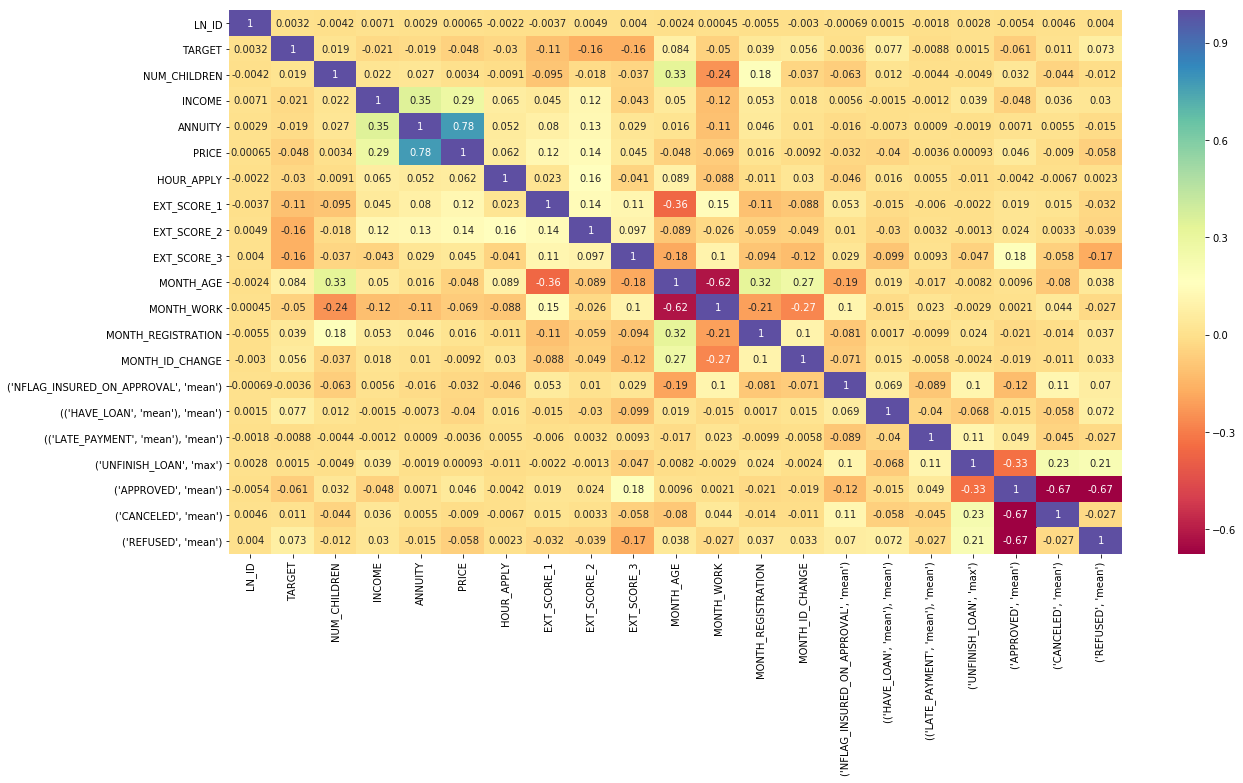

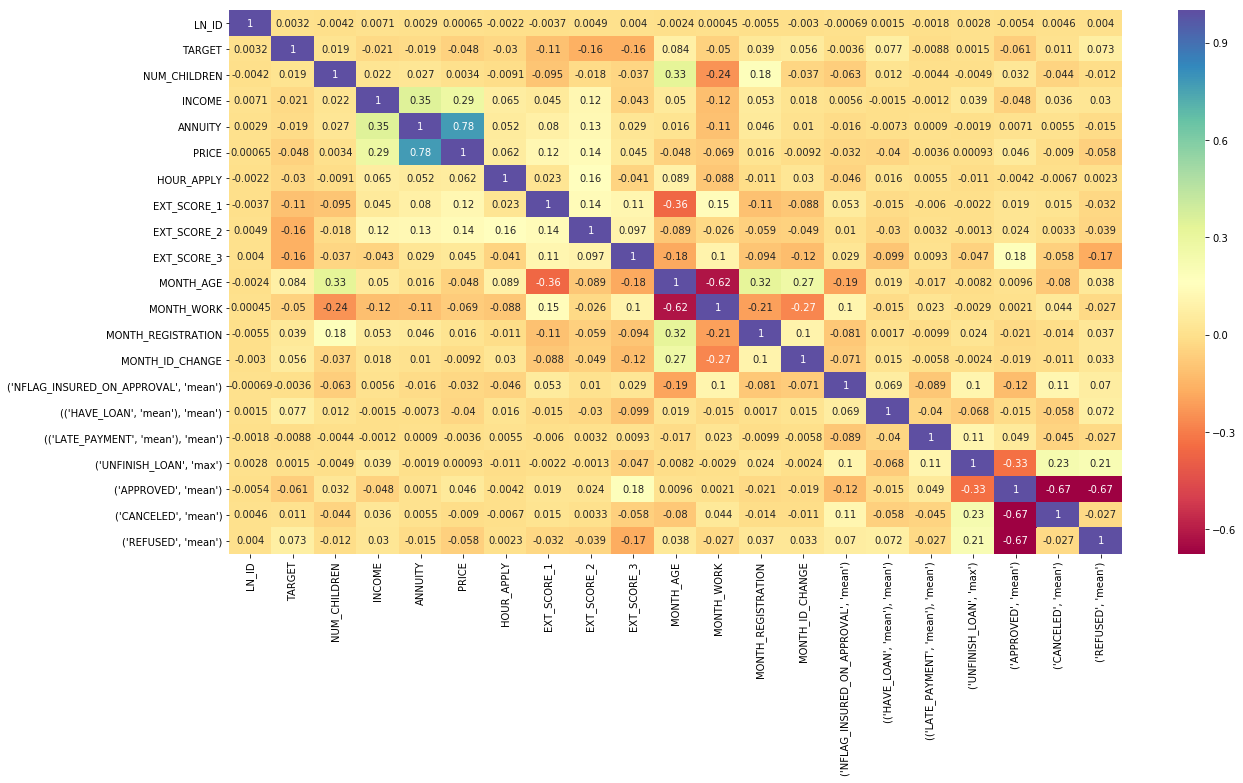

In [8]:
plt.figure(figsize=(20,10))
sns.heatmap(mergedata.corr(),annot=True,cmap = 'Spectral')

# Feature selection with Boruta

In [9]:
features = [f for f in mergedata.columns if f not in ['TARGET','LN_ID']]
len(features)

mergedata[features] = mergedata[features].fillna(0)

X = mergedata[features].values
Y = mergedata['TARGET'].values.ravel()



rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

boruta_feature_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1010, max_iter = 50, perc = 90)
boruta_feature_selector.fit(X, Y)

Iteration: 	1 / 50
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	1 / 50
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	2 / 50
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	2 / 50
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	3 / 50
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	3 / 50
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	4 / 50
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	4 / 50
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	5 / 50
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	5 / 50
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	6 / 50
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	6 / 50
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	7 / 50
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	7 / 50
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	8 / 50
Confirmed: 	13
Tentative: 	3
Rejected: 	3
Iteration: 	8 / 50
Confirmed: 	13
Tentative: 	3
Rejected: 	3
Iteration: 	9 / 50
Confi

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                          n_estimators=113, n_jobs=-1,
                                          random_state=<mtrand.RandomState object at 0x123194cd0>),
         max_iter=50, n_estimators='auto', perc=90,
         random_state=<mtrand.RandomState object at 0x123194cd0>, verbose=2)

Iteration: 	49 / 50
Confirmed: 	14
Tentative: 	2
Rejected: 	3


BorutaPy finished running.

Iteration: 	50 / 50
Confirmed: 	14
Tentative: 	1
Rejected: 	3


BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                          n_estimators=113, n_jobs=-1,
                                          random_state=<mtrand.RandomState object at 0x123194cd0>),
         max_iter=50, n_estimators='auto', perc=90,
         random_state=<mtrand.RandomState object at 0x123194cd0>, verbose=2)

In [10]:
boruta_feature_selector.ranking_

array([5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 2, 6, 1, 3, 1])

array([5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 2, 6, 1, 3, 1])

In [11]:
X_filtered = boruta_feature_selector.transform(X)
X_filtered.shape

(61503, 14)

(61503, 14)

Result from Feature selection

In [12]:
final_features = list()
indexes = np.where(boruta_feature_selector.support_ == True)
for x in np.nditer(indexes):
    final_features.append(features[x])
    
final_features.append('TARGET')
print(final_features)



['INCOME', 'ANNUITY', 'PRICE', 'HOUR_APPLY', 'EXT_SCORE_1', 'EXT_SCORE_2', 'EXT_SCORE_3', 'MONTH_AGE', 'MONTH_WORK', 'MONTH_REGISTRATION', 'MONTH_ID_CHANGE', (('HAVE_LOAN', 'mean'), 'mean'), ('APPROVED', 'mean'), ('REFUSED', 'mean'), 'TARGET']
['INCOME', 'ANNUITY', 'PRICE', 'HOUR_APPLY', 'EXT_SCORE_1', 'EXT_SCORE_2', 'EXT_SCORE_3', 'MONTH_AGE', 'MONTH_WORK', 'MONTH_REGISTRATION', 'MONTH_ID_CHANGE', (('HAVE_LOAN', 'mean'), 'mean'), ('APPROVED', 'mean'), ('REFUSED', 'mean'), 'TARGET']


Generate new data frame that using feature selection

In [13]:
train2=mergedata[final_features]
train2

,INCOME,ANNUITY,PRICE,HOUR_APPLY,EXT_SCORE_1,EXT_SCORE_2,EXT_SCORE_3,MONTH_AGE,MONTH_WORK,MONTH_REGISTRATION,MONTH_ID_CHANGE,"((HAVE_LOAN, mean), mean)","(APPROVED, mean)","(REFUSED, mean)",TARGET
0,67500.0,10125.0,202500.0,18,0.572805,0.608276,0.510787,-384,-30,-3,-91,0.000000,1.000000,0.000000,0
1,202500.0,49869.0,873000.0,14,0.655600,0.684298,0.510787,-524,-149,-59,-81,0.262798,0.800000,0.000000,0
2,180000.0,25060.5,360000.0,14,0.504081,0.580687,0.749022,-692,12174,-291,-143,0.000000,0.666667,0.166667,0
3,225000.0,26086.5,675000.0,10,0.504081,0.623740,0.710674,-688,-348,-166,-133,0.121212,1.000000,0.000000,0
4,135000.0,9000.0,180000.0,11,0.175511,0.492994,0.085595,-300,-39,-117,-54,0.146667,0.833333,0.166667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61498,360000.0,44509.5,450000.0,6,0.295858,0.104877,0.616122,-475,-193,-77,-90,0.000000,0.285714,0.714286,0
61499,441000.0,38452.5,904500.0,12,0.693816,0.411595,0.239226,-719,12174,-136,-139,0.031008,0.600000,0.400000,1
61500,202500.0,45000.0,900000.0,16,0.802154,0.714627,0.510787,-590,-52,-394,-42,0.000000,0.000000,0.000000,0
61501,94500.0,17509.5,360000.0,15,0.504081,0.694125,0.105473,-375,-138,-168,-123,0.067241,0.444444,0.222222,0


,INCOME,ANNUITY,PRICE,HOUR_APPLY,EXT_SCORE_1,EXT_SCORE_2,EXT_SCORE_3,MONTH_AGE,MONTH_WORK,MONTH_REGISTRATION,MONTH_ID_CHANGE,"((HAVE_LOAN, mean), mean)","(APPROVED, mean)","(REFUSED, mean)",TARGET
0,67500.0,10125.0,202500.0,18,0.572805,0.608276,0.510787,-384,-30,-3,-91,0.000000,1.000000,0.000000,0
1,202500.0,49869.0,873000.0,14,0.655600,0.684298,0.510787,-524,-149,-59,-81,0.262798,0.800000,0.000000,0
2,180000.0,25060.5,360000.0,14,0.504081,0.580687,0.749022,-692,12174,-291,-143,0.000000,0.666667,0.166667,0
3,225000.0,26086.5,675000.0,10,0.504081,0.623740,0.710674,-688,-348,-166,-133,0.121212,1.000000,0.000000,0
4,135000.0,9000.0,180000.0,11,0.175511,0.492994,0.085595,-300,-39,-117,-54,0.146667,0.833333,0.166667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61498,360000.0,44509.5,450000.0,6,0.295858,0.104877,0.616122,-475,-193,-77,-90,0.000000,0.285714,0.714286,0
61499,441000.0,38452.5,904500.0,12,0.693816,0.411595,0.239226,-719,12174,-136,-139,0.031008,0.600000,0.400000,1
61500,202500.0,45000.0,900000.0,16,0.802154,0.714627,0.510787,-590,-52,-394,-42,0.000000,0.000000,0.000000,0
61501,94500.0,17509.5,360000.0,15,0.504081,0.694125,0.105473,-375,-138,-168,-123,0.067241,0.444444,0.222222,0


In [14]:
features = [f for f in train2.columns if f not in ['TARGET']]
print(len(features))
print(features)
X = train2[features].values
Y = train2['TARGET'].values.ravel()

14
['INCOME', 'ANNUITY', 'PRICE', 'HOUR_APPLY', 'EXT_SCORE_1', 'EXT_SCORE_2', 'EXT_SCORE_3', 'MONTH_AGE', 'MONTH_WORK', 'MONTH_REGISTRATION', 'MONTH_ID_CHANGE', (('HAVE_LOAN', 'mean'), 'mean'), ('APPROVED', 'mean'), ('REFUSED', 'mean')]
14
['INCOME', 'ANNUITY', 'PRICE', 'HOUR_APPLY', 'EXT_SCORE_1', 'EXT_SCORE_2', 'EXT_SCORE_3', 'MONTH_AGE', 'MONTH_WORK', 'MONTH_REGISTRATION', 'MONTH_ID_CHANGE', (('HAVE_LOAN', 'mean'), 'mean'), ('APPROVED', 'mean'), ('REFUSED', 'mean')]


# Feature Importance

In [15]:
rf.fit(X, Y)
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

In [16]:
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

rank=[]
for i in range(len(features)):
    rank.append([indices[i], importances[indices[i]],features[i],])

sorted(rank,key=lambda l:l[1])

Feature ranking:
1. feature 6 (0.293138)
2. feature 5 (0.279306)
3. feature 4 (0.138403)
4. feature 11 (0.056968)
5. feature 7 (0.056458)
6. feature 8 (0.038945)
7. feature 2 (0.038534)
8. feature 13 (0.033800)
9. feature 10 (0.018359)
10. feature 12 (0.017053)
11. feature 1 (0.010195)
12. feature 9 (0.008984)
13. feature 0 (0.005158)
14. feature 3 (0.004698)
Feature ranking:
1. feature 6 (0.293138)
2. feature 5 (0.279306)
3. feature 4 (0.138403)
4. feature 11 (0.056968)
5. feature 7 (0.056458)
6. feature 8 (0.038945)
7. feature 2 (0.038534)
8. feature 13 (0.033800)
9. feature 10 (0.018359)
10. feature 12 (0.017053)
11. feature 1 (0.010195)
12. feature 9 (0.008984)
13. feature 0 (0.005158)
14. feature 3 (0.004698)


[[3, 0.004698103547130017, ('REFUSED', 'mean')],
 [0, 0.005158116343029982, ('APPROVED', 'mean')],
 [9, 0.008983934820191646, (('HAVE_LOAN', 'mean'), 'mean')],
 [1, 0.010194972295070704, 'MONTH_ID_CHANGE'],
 [12, 0.017052627503896217, 'MONTH_REGISTRATION'],
 [10, 0.018359448136081147, 'MONTH_WORK'],
 [13, 0.03379962301510974, 'MONTH_AGE'],
 [2, 0.03853434534097117, 'EXT_SCORE_3'],
 [8, 0.03894534818481942, 'EXT_SCORE_2'],
 [7, 0.0564581986526982, 'EXT_SCORE_1'],
 [11, 0.05696826002168501, 'HOUR_APPLY'],
 [4, 0.1384032527004515, 'PRICE'],
 [5, 0.27930563788995, 'ANNUITY'],
 [6, 0.2931381315489153, 'INCOME']]

[[3, 0.004698103547130017, ('REFUSED', 'mean')],
 [0, 0.005158116343029982, ('APPROVED', 'mean')],
 [9, 0.008983934820191646, (('HAVE_LOAN', 'mean'), 'mean')],
 [1, 0.010194972295070704, 'MONTH_ID_CHANGE'],
 [12, 0.017052627503896217, 'MONTH_REGISTRATION'],
 [10, 0.018359448136081147, 'MONTH_WORK'],
 [13, 0.03379962301510974, 'MONTH_AGE'],
 [2, 0.03853434534097117, 'EXT_SCORE_3'],
 [8, 0.03894534818481942, 'EXT_SCORE_2'],
 [7, 0.0564581986526982, 'EXT_SCORE_1'],
 [11, 0.05696826002168501, 'HOUR_APPLY'],
 [4, 0.1384032527004515, 'PRICE'],
 [5, 0.27930563788995, 'ANNUITY'],
 [6, 0.2931381315489153, 'INCOME']]

# SMOTE

In [17]:
X = train2[features].values
y = train2['TARGET'].values.ravel()

In [18]:
print('Original dataset shape %s' % Counter(y))

Original dataset shape Counter({0: 56534, 1: 4969})
Original dataset shape Counter({0: 56534, 1: 4969})


In [19]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 56534, 1: 56534})
Resampled dataset shape Counter({0: 56534, 1: 56534})


In [20]:
len(X_res)

113068

113068

In [21]:
train2.groupby('TARGET').agg(['count', 'size', 'unique','nunique']).stack()

ANNUITY  \
TARGET                                                              
0      count                                                56534   
       size                                                 56534   
       unique   [10125.0, 49869.0, 25060.5, 26086.5, 9000.0, 3...   
       nunique                                               9159   
1      count                                                 4969   
       size                                                  4969   
       unique   [17775.0, 31644.0, 17167.5, 35145.0, 33835.5, ...   
       nunique                                               2476   

                                                      EXT_SCORE_1  \
TARGET                                                              
0      count                                                56534   
       size                                                 56534   
       unique   [0.5728053699196503, 0.6556003694142674, 0.504...   
       nunique                                              23926   
1      count                                                 4969   
       size                                                  4969   
       unique   [0.5040805220556372, 0.3766613016066821, 0.029...   
       nunique                                               1985   

                                                      EXT_SCORE_2  \
TARGET                                                              
0      count                                                56534   
       size                                                 56534   
       unique   [0.6082758917539254, 0.6842980785664754, 0.580...   
       nunique                                              43077   
1      count                                                 4969   
       size                                                  4969   
       unique   [9.936476188005656e-06, 0.5742575813614044, 0....   
       nunique                                               4737   

                                                      EXT_SCORE_3  \
TARGET                                                              
0      count                                                56534   
       size                                                 56534   
       unique   [0.510786589522262, 0.7490217048463391, 0.7106...   
       nunique                                                717   
1      count                                                 4969   
       size                                                  4969   
       unique   [0.0005272652387098817, 0.7062051096536562, 0....   
       nunique                                                643   

                                                       HOUR_APPLY  \
TARGET                                                              
0      count                                                56534   
       size                                                 56534   
       unique   [18, 14, 10, 11, 9, 16, 12, 15, 6, 7, 8, 5, 13...   
       nunique                                                 24   
1      count                                                 4969   
       size                                                  4969   
       unique   [12, 14, 9, 19, 8, 16, 7, 13, 11, 10, 17, 4, 2...   
       nunique                                                 24   

                                                           INCOME  \
TARGET                                                              
0      count                                                56534   
       size                                                 56534   
       unique   [67500.0, 202500.0, 180000.0, 225000.0, 135000...   
       nunique                                                830   
1      count                                                 4969   
       size                                                  4969   
       unique   [108000.0, 270000.0, 62100.0, 36000

ANNUITY  \
TARGET                                                              
0      count                                                56534   
       size                                                 56534   
       unique   [10125.0, 49869.0, 25060.5, 26086.5, 9000.0, 3...   
       nunique                                               9159   
1      count                                                 4969   
       size                                                  4969   
       unique   [17775.0, 31644.0, 17167.5, 35145.0, 33835.5, ...   
       nunique                                               2476   

                                                      EXT_SCORE_1  \
TARGET                                                              
0      count                                                56534   
       size                                                 56534   
       unique   [0.5728053699196503, 0.6556003694142674, 0.504...   
       nunique                                              23926   
1      count                                                 4969   
       size                                                  4969   
       unique   [0.5040805220556372, 0.3766613016066821, 0.029...   
       nunique                                               1985   

                                                      EXT_SCORE_2  \
TARGET                                                              
0      count                                                56534   
       size                                                 56534   
       unique   [0.6082758917539254, 0.6842980785664754, 0.580...   
       nunique                                              43077   
1      count                                                 4969   
       size                                                  4969   
       unique   [9.936476188005656e-06, 0.5742575813614044, 0....   
       nunique                                               4737   

                                                      EXT_SCORE_3  \
TARGET                                                              
0      count                                                56534   
       size                                                 56534   
       unique   [0.510786589522262, 0.7490217048463391, 0.7106...   
       nunique                                                717   
1      count                                                 4969   
       size                                                  4969   
       unique   [0.0005272652387098817, 0.7062051096536562, 0....   
       nunique                                                643   

                                                       HOUR_APPLY  \
TARGET                                                              
0      count                                                56534   
       size                                                 56534   
       unique   [18, 14, 10, 11, 9, 16, 12, 15, 6, 7, 8, 5, 13...   
       nunique                                                 24   
1      count                                                 4969   
       size                                                  4969   
       unique   [12, 14, 9, 19, 8, 16, 7, 13, 11, 10, 17, 4, 2...   
       nunique                                                 24   

                                                           INCOME  \
TARGET                                                              
0      count                                                56534   
       size                                                 56534   
       unique   [67500.0, 202500.0, 180000.0, 225000.0, 135000...   
       nunique                                                830   
1      count                                                 4969   
       size                                                  4969   
       unique   [108000.0, 270000.0, 62100.0, 36000

# Cross Validation train data

In [22]:
X = train2[features].values
y = train2['TARGET'].values.ravel()


skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(X, y)

5

5

In [23]:
for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    rf.fit(X_train, y_train)
    y_pred=rf.predict(X_test)
    

    
    target_names = ['Target 0', 'Target 1']
    print(classification_report(y_test, y_pred, target_names=target_names))
    
    cm = confusion_matrix(y_test, y_pred)
    print(accuracy_score(y_test, y_pred))
    print(cm)
    

TRAIN: [12235 12236 12237 ... 61500 61501 61502] TEST: [    0     1     2 ... 12975 12998 13005]
TRAIN: [12235 12236 12237 ... 61500 61501 61502] TEST: [    0     1     2 ... 12975 12998 13005]
              precision    recall  f1-score   support

    Target 0       0.95      0.68      0.80     11307
    Target 1       0.15      0.63      0.24       994

    accuracy                           0.68     12301
   macro avg       0.55      0.66      0.52     12301
weighted avg       0.89      0.68      0.75     12301

0.6804324851638078
[[7743 3564]
 [ 367  627]]
TRAIN: [    0     1     2 ... 61500 61501 61502] TEST: [12235 12236 12237 ... 24885 24896 24921]
              precision    recall  f1-score   support

    Target 0       0.95      0.68      0.80     11307
    Target 1       0.15      0.63      0.24       994

    accuracy                           0.68     12301
   macro avg       0.55      0.66      0.52     12301
weighted avg       0.89      0.68      0.75     12301

0.6804324

In [24]:
for train_index, test_index in skf.split(X_res, y_res):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_res_train, X_res_test = X_res[train_index], X_res[test_index]
    y_res_train, y_res_test = y_res[train_index], y_res[test_index]
    rf.fit(X_res_train, y_res_train)
    y_res_pred=rf.predict(X_res_test)
    
    target_names = ['Target 0', 'Target 1']
    print(classification_report(y_res_test, y_res_pred, target_names=target_names))
    
    cm = confusion_matrix(y_res_test, y_res_pred)
    print(accuracy_score(y_res_test, y_res_pred))
    print(cm)
    

TRAIN: [ 12235  12236  12237 ... 113065 113066 113067] TEST: [    0     1     2 ... 67838 67839 67840]
TRAIN: [ 12235  12236  12237 ... 113065 113066 113067] TEST: [    0     1     2 ... 67838 67839 67840]
              precision    recall  f1-score   support

    Target 0       0.69      0.77      0.73     11307
    Target 1       0.74      0.64      0.69     11307

    accuracy                           0.71     22614
   macro avg       0.71      0.71      0.71     22614
weighted avg       0.71      0.71      0.71     22614

0.7090740249403025
[[8749 2558]
 [4021 7286]]
TRAIN: [     0      1      2 ... 113065 113066 113067] TEST: [12235 12236 12237 ... 79145 79146 79147]
              precision    recall  f1-score   support

    Target 0       0.69      0.77      0.73     11307
    Target 1       0.74      0.64      0.69     11307

    accuracy                           0.71     22614
   macro avg       0.71      0.71      0.71     22614
weighted avg       0.71      0.71      0.71   

# Train Model with Train data

In [25]:
rf.fit(X, y)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=113,
                       n_jobs=-1,
                       random_state=<mtrand.RandomState object at 0x123194cd0>)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=113,
                       n_jobs=-1,
                       random_state=<mtrand.RandomState object at 0x123194cd0>)

# Insert Test data

In [26]:
app_test=pd.read_csv('app_test.csv')
app_test.head()
test=app_test.drop(['Unnamed: 0',],axis = 1)
test

,LN_ID,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,INCOME_TYPE,...,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_ID_CHANGE,WEEKDAYS_APPLY,HOUR_APPLY,ORGANIZATION_TYPE,EXT_SCORE_1,EXT_SCORE_2,EXT_SCORE_3
0,219092,0,Cash loans,M,3,135000.0,871029.0,44604.0,765000.0,Working,...,-17598,-2650,-1411.0,-1131,SATURDAY,7,Business Entity Type 3,NaN,0.145475,0.651260
1,141577,0,Cash loans,F,0,144000.0,485640.0,34537.5,450000.0,Working,...,-14097,-7408,-7908.0,-4872,MONDAY,14,Kindergarten,NaN,0.682675,NaN
2,180205,0,Cash loans,F,1,90000.0,247500.0,8887.5,247500.0,Working,...,-18384,-2826,-8226.0,-1930,SATURDAY,12,Self-employed,0.814700,0.686312,0.758393
3,357381,0,Cash loans,M,2,112500.0,506889.0,24781.5,418500.0,Working,...,-12170,-926,-916.0,-4048,THURSDAY,13,Other,0.399219,0.266520,0.058826
4,271229,0,Cash loans,M,0,216000.0,450000.0,21888.0,450000.0,Working,...,-10790,-577,-4640.0,-2035,MONDAY,14,Business Entity Type 3,0.368452,0.610483,0.392774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14756,144293,0,Cash loans,F,1,67500.0,112500.0,7317.0,112500.0,Working,...,-12866,-3154,-1251.0,-4395,TUESDAY,10,Government,0.570305,0.399628,0.586740
14757,272093,1,Cash loans,F,1,135000.0,313438.5,21073.5,283500.0,Working,...,-11421,-3962,-5247.0,-3795,SATURDAY,7,Self-employed,NaN,0.610758,0.368969
14758,251117,0,Cash loans,F,0,157500.0,1078200.0,31522.5,900000.0,State servant,...,-13313,-2258,-3899.0,-4515,MONDAY,12,Other,NaN,0.639824,0.782608
14759,334313,0,Cash loans,F,0,216000.0,272520.0,21658.5,225000.0,Pensioner,...,-24085,365243,-9354.0,-4740,THURSDAY,15,NA1,NaN,0.642139,0.584990


,LN_ID,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,INCOME_TYPE,...,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_ID_CHANGE,WEEKDAYS_APPLY,HOUR_APPLY,ORGANIZATION_TYPE,EXT_SCORE_1,EXT_SCORE_2,EXT_SCORE_3
0,219092,0,Cash loans,M,3,135000.0,871029.0,44604.0,765000.0,Working,...,-17598,-2650,-1411.0,-1131,SATURDAY,7,Business Entity Type 3,NaN,0.145475,0.651260
1,141577,0,Cash loans,F,0,144000.0,485640.0,34537.5,450000.0,Working,...,-14097,-7408,-7908.0,-4872,MONDAY,14,Kindergarten,NaN,0.682675,NaN
2,180205,0,Cash loans,F,1,90000.0,247500.0,8887.5,247500.0,Working,...,-18384,-2826,-8226.0,-1930,SATURDAY,12,Self-employed,0.814700,0.686312,0.758393
3,357381,0,Cash loans,M,2,112500.0,506889.0,24781.5,418500.0,Working,...,-12170,-926,-916.0,-4048,THURSDAY,13,Other,0.399219,0.266520,0.058826
4,271229,0,Cash loans,M,0,216000.0,450000.0,21888.0,450000.0,Working,...,-10790,-577,-4640.0,-2035,MONDAY,14,Business Entity Type 3,0.368452,0.610483,0.392774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14756,144293,0,Cash loans,F,1,67500.0,112500.0,7317.0,112500.0,Working,...,-12866,-3154,-1251.0,-4395,TUESDAY,10,Government,0.570305,0.399628,0.586740
14757,272093,1,Cash loans,F,1,135000.0,313438.5,21073.5,283500.0,Working,...,-11421,-3962,-5247.0,-3795,SATURDAY,7,Self-employed,NaN,0.610758,0.368969
14758,251117,0,Cash loans,F,0,157500.0,1078200.0,31522.5,900000.0,State servant,...,-13313,-2258,-3899.0,-4515,MONDAY,12,Other,NaN,0.639824,0.782608
14759,334313,0,Cash loans,F,0,216000.0,272520.0,21658.5,225000.0,Pensioner,...,-24085,365243,-9354.0,-4740,THURSDAY,15,NA1,NaN,0.642139,0.584990


# Pre-processing Test Data

In [27]:
test['MONTH_AGE']=test['DAYS_AGE']/30
test['MONTH_WORK']=test['DAYS_WORK']/30
test['MONTH_REGISTRATION']=test['DAYS_REGISTRATION']/30
test['MONTH_ID_CHANGE']=test['DAYS_ID_CHANGE']/30



test['MONTH_AGE']=test['MONTH_AGE'].astype('int64', copy=False)
test['MONTH_WORK']=test['MONTH_WORK'].astype('int64', copy=False)
test['MONTH_REGISTRATION']=test['MONTH_REGISTRATION'].astype('int64', copy=False)
test['MONTH_ID_CHANGE']=test['MONTH_ID_CHANGE'].astype('int64', copy=False)



test=pd.get_dummies(test)
test

features = [f for f in test.columns if f not in ['TARGET','LN_ID']]
len(features)

test[features] = test[features].fillna(test[features].mean()).clip(-1e9,1e9)

#  Insert Sec Data

In [28]:
mergedata2 = pd.merge(left=test, right=sec_data, how='left', left_on='LN_ID', right_on='LN_ID')
mergedata2

/usr/local/lib/python3.7/site-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


,LN_ID,TARGET,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,...,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,"(NFLAG_INSURED_ON_APPROVAL, mean)","((HAVE_LOAN, mean), mean)","((LATE_PAYMENT, mean), mean)","(UNFINISH_LOAN, max)","(APPROVED, mean)","(CANCELED, mean)","(REFUSED, mean)"
0,219092,0,3,135000.0,871029.0,44604.0,765000.0,-17598,-2650,-1411.0,...,0,0,0,0.000000,0.066667,0.100000,1.0,0.500000,0.50,0.000000
1,141577,0,0,144000.0,485640.0,34537.5,450000.0,-14097,-7408,-7908.0,...,0,0,0,0.000000,0.222222,0.111111,0.0,1.000000,0.00,0.000000
2,180205,0,1,90000.0,247500.0,8887.5,247500.0,-18384,-2826,-8226.0,...,0,0,0,0.333333,0.000000,0.000000,1.0,0.750000,0.25,0.000000
3,357381,0,2,112500.0,506889.0,24781.5,418500.0,-12170,-926,-916.0,...,0,0,0,0.000000,0.307692,0.153846,1.0,0.181818,0.00,0.818182
4,271229,0,0,216000.0,450000.0,21888.0,450000.0,-10790,-577,-4640.0,...,0,0,0,0.000000,0.000000,0.000000,1.0,0.600000,0.40,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14756,144293,0,1,67500.0,112500.0,7317.0,112500.0,-12866,-3154,-1251.0,...,0,0,0,0.200000,0.000000,0.292308,1.0,1.000000,0.00,0.000000
14757,272093,1,1,135000.0,313438.5,21073.5,283500.0,-11421,-3962,-5247.0,...,0,0,0,0.500000,0.000000,0.000000,1.0,0.500000,0.25,0.125000
14758,251117,0,0,157500.0,1078200.0,31522.5,900000.0,-13313,-2258,-3899.0,...,0,0,0,0.200000,0.360000,0.241270,1.0,1.000000,0.00,0.000000
14759,334313,0,0,216000.0,272520.0,21658.5,225000.0,-24085,365243,-9354.0,...,0,0,0,1.000000,0.000000,0.000000,1.0,0.666667,0.00,0.000000


/usr/local/lib/python3.7/site-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


,LN_ID,TARGET,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,...,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,"(NFLAG_INSURED_ON_APPROVAL, mean)","((HAVE_LOAN, mean), mean)","((LATE_PAYMENT, mean), mean)","(UNFINISH_LOAN, max)","(APPROVED, mean)","(CANCELED, mean)","(REFUSED, mean)"
0,219092,0,3,135000.0,871029.0,44604.0,765000.0,-17598,-2650,-1411.0,...,0,0,0,0.000000,0.066667,0.100000,1.0,0.500000,0.50,0.000000
1,141577,0,0,144000.0,485640.0,34537.5,450000.0,-14097,-7408,-7908.0,...,0,0,0,0.000000,0.222222,0.111111,0.0,1.000000,0.00,0.000000
2,180205,0,1,90000.0,247500.0,8887.5,247500.0,-18384,-2826,-8226.0,...,0,0,0,0.333333,0.000000,0.000000,1.0,0.750000,0.25,0.000000
3,357381,0,2,112500.0,506889.0,24781.5,418500.0,-12170,-926,-916.0,...,0,0,0,0.000000,0.307692,0.153846,1.0,0.181818,0.00,0.818182
4,271229,0,0,216000.0,450000.0,21888.0,450000.0,-10790,-577,-4640.0,...,0,0,0,0.000000,0.000000,0.000000,1.0,0.600000,0.40,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14756,144293,0,1,67500.0,112500.0,7317.0,112500.0,-12866,-3154,-1251.0,...,0,0,0,0.200000,0.000000,0.292308,1.0,1.000000,0.00,0.000000
14757,272093,1,1,135000.0,313438.5,21073.5,283500.0,-11421,-3962,-5247.0,...,0,0,0,0.500000,0.000000,0.000000,1.0,0.500000,0.25,0.125000
14758,251117,0,0,157500.0,1078200.0,31522.5,900000.0,-13313,-2258,-3899.0,...,0,0,0,0.200000,0.360000,0.241270,1.0,1.000000,0.00,0.000000
14759,334313,0,0,216000.0,272520.0,21658.5,225000.0,-24085,365243,-9354.0,...,0,0,0,1.000000,0.000000,0.000000,1.0,0.666667,0.00,0.000000


# Select feature from borutas

In [29]:
test=mergedata2[final_features]

features = [f for f in test.columns if f not in ['TARGET']]
len(features)

test[features] = test[features].fillna(0)

test

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,INCOME,ANNUITY,PRICE,HOUR_APPLY,EXT_SCORE_1,EXT_SCORE_2,EXT_SCORE_3,MONTH_AGE,MONTH_WORK,MONTH_REGISTRATION,MONTH_ID_CHANGE,"((HAVE_LOAN, mean), mean)","(APPROVED, mean)","(REFUSED, mean)",TARGET
0,135000.0,44604.0,765000.0,7,0.507092,0.145475,0.651260,-586,-88,-47,-37,0.066667,0.500000,0.000000,0
1,144000.0,34537.5,450000.0,14,0.507092,0.682675,0.511901,-469,-246,-263,-162,0.222222,1.000000,0.000000,0
2,90000.0,8887.5,247500.0,12,0.814700,0.686312,0.758393,-612,-94,-274,-64,0.000000,0.750000,0.000000,0
3,112500.0,24781.5,418500.0,13,0.399219,0.266520,0.058826,-405,-30,-30,-134,0.307692,0.181818,0.818182,0
4,216000.0,21888.0,450000.0,14,0.368452,0.610483,0.392774,-359,-19,-154,-67,0.000000,0.600000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14756,67500.0,7317.0,112500.0,10,0.570305,0.399628,0.586740,-428,-105,-41,-146,0.000000,1.000000,0.000000,0
14757,135000.0,21073.5,283500.0,7,0.507092,0.610758,0.368969,-380,-132,-174,-126,0.000000,0.500000,0.125000,1
14758,157500.0,31522.5,900000.0,12,0.507092,0.639824,0.782608,-443,-75,-129,-150,0.360000,1.000000,0.000000,0
14759,216000.0,21658.5,225000.0,15,0.507092,0.642139,0.584990,-802,12174,-311,-158,0.000000,0.666667,0.000000,0


/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,INCOME,ANNUITY,PRICE,HOUR_APPLY,EXT_SCORE_1,EXT_SCORE_2,EXT_SCORE_3,MONTH_AGE,MONTH_WORK,MONTH_REGISTRATION,MONTH_ID_CHANGE,"((HAVE_LOAN, mean), mean)","(APPROVED, mean)","(REFUSED, mean)",TARGET
0,135000.0,44604.0,765000.0,7,0.507092,0.145475,0.651260,-586,-88,-47,-37,0.066667,0.500000,0.000000,0
1,144000.0,34537.5,450000.0,14,0.507092,0.682675,0.511901,-469,-246,-263,-162,0.222222,1.000000,0.000000,0
2,90000.0,8887.5,247500.0,12,0.814700,0.686312,0.758393,-612,-94,-274,-64,0.000000,0.750000,0.000000,0
3,112500.0,24781.5,418500.0,13,0.399219,0.266520,0.058826,-405,-30,-30,-134,0.307692,0.181818,0.818182,0
4,216000.0,21888.0,450000.0,14,0.368452,0.610483,0.392774,-359,-19,-154,-67,0.000000,0.600000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14756,67500.0,7317.0,112500.0,10,0.570305,0.399628,0.586740,-428,-105,-41,-146,0.000000,1.000000,0.000000,0
14757,135000.0,21073.5,283500.0,7,0.507092,0.610758,0.368969,-380,-132,-174,-126,0.000000,0.500000,0.125000,1
14758,157500.0,31522.5,900000.0,12,0.507092,0.639824,0.782608,-443,-75,-129,-150,0.360000,1.000000,0.000000,0
14759,216000.0,21658.5,225000.0,15,0.507092,0.642139,0.584990,-802,12174,-311,-158,0.000000,0.666667,0.000000,0


In [30]:
features = [f for f in test.columns if f not in ['TARGET']]
print(len(features))
print(features)

14
['INCOME', 'ANNUITY', 'PRICE', 'HOUR_APPLY', 'EXT_SCORE_1', 'EXT_SCORE_2', 'EXT_SCORE_3', 'MONTH_AGE', 'MONTH_WORK', 'MONTH_REGISTRATION', 'MONTH_ID_CHANGE', (('HAVE_LOAN', 'mean'), 'mean'), ('APPROVED', 'mean'), ('REFUSED', 'mean')]
14
['INCOME', 'ANNUITY', 'PRICE', 'HOUR_APPLY', 'EXT_SCORE_1', 'EXT_SCORE_2', 'EXT_SCORE_3', 'MONTH_AGE', 'MONTH_WORK', 'MONTH_REGISTRATION', 'MONTH_ID_CHANGE', (('HAVE_LOAN', 'mean'), 'mean'), ('APPROVED', 'mean'), ('REFUSED', 'mean')]


In [31]:
X = test[features].values
y = test['TARGET'].values.ravel()

In [32]:
y_pred = rf.predict(X)

In [33]:
f1_score(y, y_pred, average='micro')

0.7196666892486959

0.7196666892486959

In [34]:
f1_score(y, y_pred, average='macro')

0.542919926712757

0.542919926712757

In [35]:
target_names = ['Target 0', 'Target 1']
print(classification_report(y, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Target 0       0.95      0.73      0.83     13558
    Target 1       0.16      0.60      0.26      1203

    accuracy                           0.72     14761
   macro avg       0.56      0.67      0.54     14761
weighted avg       0.89      0.72      0.78     14761

              precision    recall  f1-score   support

    Target 0       0.95      0.73      0.83     13558
    Target 1       0.16      0.60      0.26      1203

    accuracy                           0.72     14761
   macro avg       0.56      0.67      0.54     14761
weighted avg       0.89      0.72      0.78     14761



In [36]:
cm = confusion_matrix(y, y_pred)
accuracy_score(y, y_pred)

0.7196666892486959

0.7196666892486959

In [37]:
cm

array([[9901, 3657],
       [ 481,  722]])

array([[9901, 3657],
       [ 481,  722]])